## author: Keer Mei
- github: kmei92
- email: keer.mei18@imperial.ac.uk

# Setup

In [3]:
# importing the necessary modules
import sys
sys.path.append("..")
from fireframe.PDESystem import *
from fireframe.PDESubsystem import *
from fireframe.pdeforms import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creating pde_solver, a child object from PDESystem

In [4]:
# a PDESystem child class called PDESolver. Note, the setup_constants function and setup_bcs are declared
# and overloaded here and the PDESystem's functions are not used. This is designed for clarity
class pde_solver(PDESystem):
    def __init__(self, comp, mesh, parameters):
        PDESystem.__init__(self, comp, mesh, parameters)

    def setup_bcs(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        
        bcu = [fd.DirichletBC(self.V['u'], fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder no slip
          fd.DirichletBC(self.V['u'], ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
        bcp = [fd.DirichletBC(self.V['p'], fd.Constant(0), 3)]  # outflow
        
        self.bc['u'][0] = [bcu, None, None, None,'fixed'] # static boundary
        self.bc['p'] = [[bcp, None, None, None, 'fixed']] # static boundary
    
    def setup_constants(self):
        self.constants.update({
            'deltat' : fd.Constant(self.prm['dt']), # time step
            'n' : fd.FacetNormal(self.mesh), # normal direction
            'f' : fd.Constant((0.0, 0.0)), # body force
            'nu' : fd.Constant(0.001) # fluid viscosity
        })

# Solve

In [5]:
# update the parameters. note p is not defined as it uses the default values
solver_parameters = recursive_update(solver_parameters, 
{
'space': {'u': fd.VectorFunctionSpace},
'degree': {'u': 2},
'ksp_type': {'u': 'gmres', 'p': 'gmres'},
'precond': {'u': 'sor', 'p':'sor'},
'dt' : 0.01,
'T' :5.0
}
)

# load the mesh
mesh = fd.Mesh("../meshes/flow_past_cylinder.msh")
# declare a new pde_solver object with a velocity and pressure variable
solver = pde_solver([['u', 'p']], mesh, solver_parameters)
# set up constants
solver.setup_constants()
#  define the pdesystems and variable sequence
solver.define(['u', 'p', 'u'], 'up', navier_stokes)
# print(solver.bc)
# setup boundary conditions
solver.setup_bcs()
# print(solver.bc)
# solve
solver.solve(time_update=False)

time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000


# Plotting

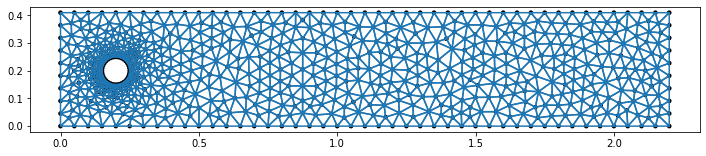

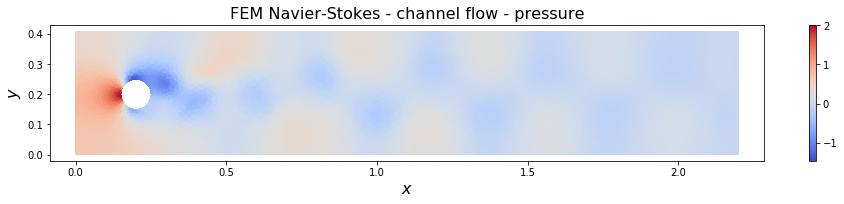

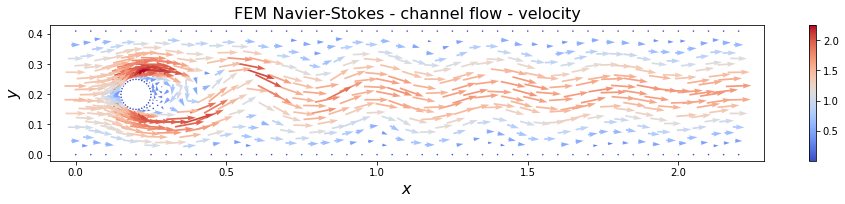

In [6]:
# we can use firedrake's plot function to visualize the mesh, pressure field, and velocity field
fig1 = plt.figure(figsize=(12, 4))
ax1 = fig1.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig2 = plt.figure(figsize=(16, 2.5))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('FEM Navier-Stokes - channel flow - pressure', fontsize=16)
fd.plot(solver.form_args['p_'],axes=ax2)
ax2.axis('equal')

fig3 = plt.figure(figsize=(16, 2.5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(solver.form_args['u_'],axes=ax3)
ax3.axis('equal');